# Optional Lab: Scikit-learn

Week 2

Open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many algorithms

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('/Users/amyfox/Python/ml_specialization/deeplearning.mplstyle')

### Load the data

In [7]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

### Scale / normalize training data

StandardScaler - performs z-score normalization

In [8]:
scaler = StandardScaler() # zscore normalizatoin
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


### Create and fit regression model

SGDRegressor - gradient descent regression model

In [9]:
sgdr = SGDRegressor(max_iter=1000) # gradient descent
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 112, number of weight updates: 11089.0


### View parameters
Note, the parameters are associated with the *normalized* input data.

In [13]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [109.98 -20.92 -32.33 -38.08], b:[363.18]


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [11]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.19 485.98 389.73 492.14]
Target values 
[300.  509.8 394.  540. ]


### Plot prediction vs target values

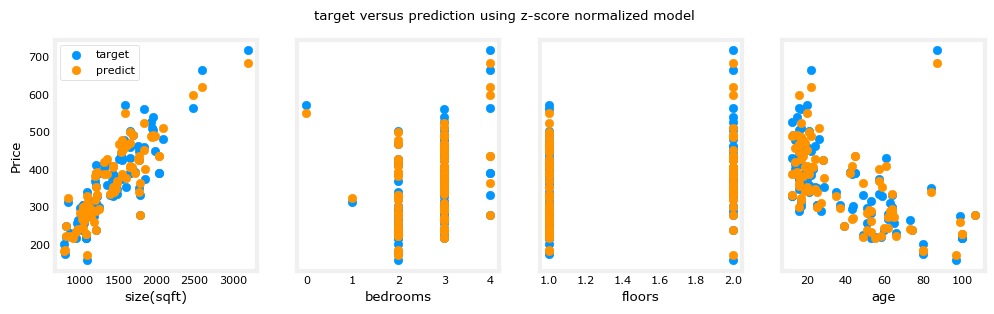

In [12]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## Optional Lab: Logistic Regression using Scikit-learn

In [1]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

Fit the model

In [2]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

Make predictions

In [4]:
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


Calculate accuracy using the `score` function.

In [5]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0
